In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras import preprocessing
from keras.models import Sequential




In [2]:
from keras.layers import Conv2D,Conv2DTranspose,BatchNormalization,LeakyReLU,Dropout,Dense,Flatten,Reshape,ReLU
import tensorflow as tf


In [3]:
data = pd.read_csv("/kaggle/input/celeba-dataset/list_attr_celeba.csv")
data

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [4]:
images_paths = []
i = 0
for name in data["image_id"]:
    path = "/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/" + name
    images_paths.append(path)
    if i>= 2000:
        break
    i=i+1

In [5]:
from PIL import Image

In [6]:
cropping_box = (30,55,150,175)
training_images = [np.array(Image.open(path).crop(cropping_box).resize((64,64))) for path in images_paths]


In [7]:
for i in range(len(training_images)):
  training_images[i] = (training_images[i])/255

In [8]:
training_images = np.array(training_images)

In [9]:
print(training_images.shape)

(2001, 64, 64, 3)


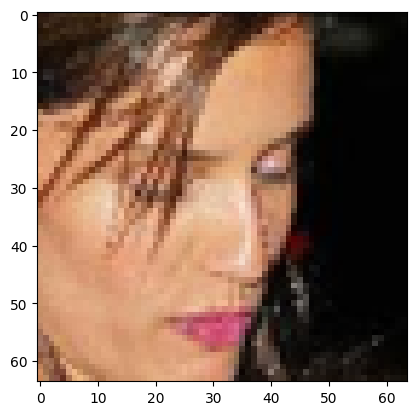

In [10]:
plt.imshow(training_images[3])

In [11]:
noise_shape = 100
def generator_model():
  generator = Sequential()
  generator.add(Dense(4*4*512,input_shape=(noise_shape,)))
  generator.add(Reshape((4,4,512)))
  generator.add(Conv2DTranspose(256,kernel_size=(4,4),strides=(2,2),padding="same"))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))
  generator.add(Conv2DTranspose(128,kernel_size=(4,4),strides=(2,2),padding="same"))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))
  
  generator.add(Conv2DTranspose(64,kernel_size=(4,4),strides=(2,2),padding="same"))
  generator.add(BatchNormalization())
  generator.add(LeakyReLU(0.2))

 

  generator.add(Conv2DTranspose(3,kernel_size=(4,4),strides=(2,2),padding="same",activation="sigmoid"))
  return generator



In [12]:
generator = generator_model()
generator.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8192)           │       827,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 256)      │     2,097,408 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 64)     │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 3)      │         3,075 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585,219 (13.68 MB)

 Trainable params: 3,584,323 (13.67 MB)

 Non-trainable params: 896 (3.50 KB)

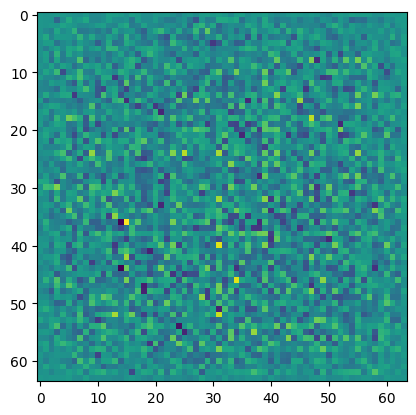

In [13]:
random_noise = tf.random.uniform([1,100])
generated_image = generator(random_noise,training=False)
plt.imshow(generated_image[0,:,:,0])

In [14]:
def discriminator_model():
  discriminator = Sequential()
  discriminator.add(Conv2D(64,kernel_size = 3,strides = 2,padding='same',input_shape = (64,64,3)))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.4))

  discriminator.add(Conv2D(64,kernel_size = 3,strides = 2,padding='same'))
  discriminator.add(BatchNormalization())
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.4))

  discriminator.add(Flatten())
  discriminator.add(Dense(1,activation='sigmoid'))
  return discriminator

In [15]:
discriminator = discriminator_model()
discriminator.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        16,385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,361 (216.25 KB)

 Trainable params: 55,233 (215.75 KB)

 Non-trainable params: 128 (512.00 B)

In [16]:
GAN = Sequential([generator,discriminator])
discriminator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.trainable = False
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [17]:
epochs = 10
batch_size = 64
loss_from_discriminator_model = []
loss_from_generator_model = []
for epoch in range(epochs):
  print("currently on epoch : ",epoch)
  for i in range(training_images.shape[0]//batch_size):
    noise = np.random.uniform(-1,1,size = (batch_size,noise_shape))
    generated_images = generator.predict_on_batch(noise)
    train_dataset = training_images[i*batch_size:(i+1)*batch_size]
    train_labels_real = np.ones(shape = (batch_size,1))
    discriminator.trainable = True
    d_loss_real = discriminator.train_on_batch(train_dataset,train_labels_real)
    train_labels_fake = np.zeros(shape = (batch_size,1))
    d_loss_fake = discriminator.train_on_batch(generated_images,train_labels_fake)
    noise = np.random.uniform(-1,1,size = (batch_size,noise_shape))
    train_labels_fake_for_gan = np.ones(shape = (batch_size,1))
    discriminator.trainable = False
    """Now the discriminator is trained. To train the generator, we would
    train the whole adversarial network after freezing the discriminator
    """
    g_loss = GAN.train_on_batch(noise,train_labels_fake_for_gan)
    loss_from_discriminator_model.append(d_loss_real+d_loss_fake)
    loss_from_generator_model.append(g_loss)
   

currently on epoch :  0


I0000 00:00:1727541879.883144   12964 service.cc:145] XLA service 0x7974d4002f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727541879.883212   12964 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1727541880.363639   12964 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


currently on epoch :  1
currently on epoch :  2
currently on epoch :  3
currently on epoch :  4
currently on epoch :  5
currently on epoch :  6
currently on epoch :  7
currently on epoch :  8
currently on epoch :  9


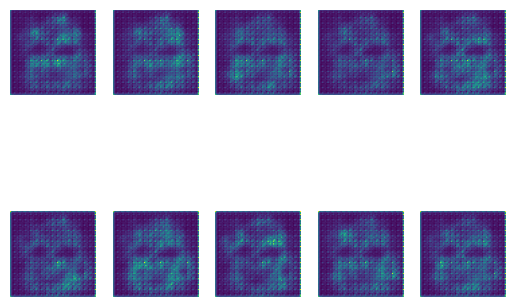

epoch :  10 loss :  [array(0.03204557, dtype=float32), array(0.03204557, dtype=float32)]


In [19]:
samples = 10
noise = np.random.uniform(-1,1,size = (samples,noise_shape))
generated_images = generator.predict_on_batch(noise)
for i in range(samples):
      plt.subplot(2,5,i+1)
      plt.imshow(generated_images[i,:,:,0])
      plt.axis('off')
plt.show()
print("epoch : ",epoch+1, "loss : ",g_loss)